In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimensional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [3]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assignment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [3]:
# Create a tensor
elements = [5]*3125
array_5d = np.array(elements).reshape((5,5,5,5,5))

tensor_5d = Tensor(array_5d)
print(tensor_5d)
tensor_5d.data

This tensor is of order 5 and consists of 3125 elements.
Sizes and names of its modes are (5, 5, 5, 5, 5) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.


array([[[[[5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5]],

         [[5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5]],

         [[5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5]],

         [[5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5]],

         [[5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5]]],


        [[[5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5]],

         [[5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5]],

         [[5, 5, 5, 5, 5],
          [5

In [4]:
# Calculate Frobenious norm
frobenius_norm = tensor_5d.frob_norm
print(frobenius_norm)

279.5084971874737


### Solution: Part 2

In [5]:
# Create tensors and collect information
tensors = []
element_counts = []

dimensions = [2]

orders = range(3, 21)

for order in orders:
    tensor = np.ones(dimensions * order)
    tensors.append(tensor)
    element_counts.append(tensor.size)

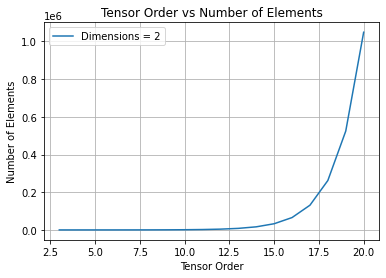

In [6]:
# Plot results
plt.plot(orders, element_counts)
plt.legend(['Dimensions = 2'])
plt.title('Tensor Order vs Number of Elements')
plt.xlabel('Tensor Order')
plt.ylabel('Number of Elements')
plt.grid(True)
plt.show()

### Solution: Part 3

In [7]:
# Create tensors and collect information
tensors = []
element_counts = []

order = 3

sizes = range(3, 16)

for size in sizes:
    tensor = np.ones(order * [size])
    tensors.append(tensor)
    element_counts.append(tensor.size)

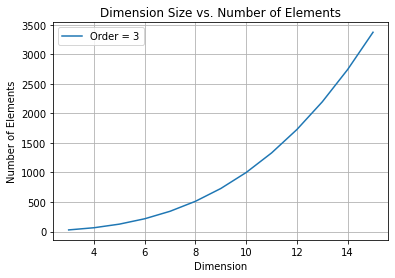

In [8]:
# Plot results
plt.plot(sizes, element_counts)
plt.legend(['Order = 3'])
plt.title('Dimension Size vs. Number of Elements')
plt.xlabel('Dimension')
plt.ylabel('Number of Elements')
plt.grid(True)
plt.show()

### Solution: Part 4

The correlation between tensor order and the total number of elements exhibits an exponential trend; whereas, the relationship between tensor dimension and the number of elements follows a polynomial pattern. Consequently, augmenting the tensor's order significantly escalates the memory demand compared to enlarging its dimension size, as exponentials grow much faster than polynomials.

# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [ ]:
# Mode-2 fiber
tensor.data[0,1,:]

In [ ]:
# Frontal slice
tensor.data[0,:,:]

## **Assignment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [9]:
# Create a tensor of order 4
tensor_4d = Tensor(np.arange(81).reshape((3,3,3,3)))
print(tensor_4d)
tensor_4d.data

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]],


       [[[54, 55, 56],
         [57, 58, 59],
         [60, 61, 62]],

        [[63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80]]]])

In [10]:
# Display slices
for i in range(3):
    for j in range(3):
        print('tensor_4d({a},:,:,{b})'.format(a=i,b=j))
        print(tensor_4d.data[i,:,:,j], '\n')

tensor_4d(0,:,:,0)
[[ 0  3  6]
 [ 9 12 15]
 [18 21 24]] 

tensor_4d(0,:,:,1)
[[ 1  4  7]
 [10 13 16]
 [19 22 25]] 

tensor_4d(0,:,:,2)
[[ 2  5  8]
 [11 14 17]
 [20 23 26]] 

tensor_4d(1,:,:,0)
[[27 30 33]
 [36 39 42]
 [45 48 51]] 

tensor_4d(1,:,:,1)
[[28 31 34]
 [37 40 43]
 [46 49 52]] 

tensor_4d(1,:,:,2)
[[29 32 35]
 [38 41 44]
 [47 50 53]] 

tensor_4d(2,:,:,0)
[[54 57 60]
 [63 66 69]
 [72 75 78]] 

tensor_4d(2,:,:,1)
[[55 58 61]
 [64 67 70]
 [73 76 79]] 

tensor_4d(2,:,:,2)
[[56 59 62]
 [65 68 71]
 [74 77 80]] 



In [11]:
# Display fibers
for (i,j) in [(0,0),(0,1),(0,2),(1,0),(1,1)]:
    print('tensor_4d({a},:,{b},1)'.format(a=i,b=j))
    print(tensor_4d.data[i,:,j,1], '\n')

tensor_4d(0,:,0,1)
[ 1 10 19] 

tensor_4d(0,:,1,1)
[ 4 13 22] 

tensor_4d(0,:,2,1)
[ 7 16 25] 

tensor_4d(1,:,0,1)
[28 37 46] 

tensor_4d(1,:,1,1)
[31 40 49] 



### Solution: Part 2

In [12]:
# Create a tensor of order 3
tensor_3d = Tensor(np.ones(40).reshape((4,2,5)))

for i in range(5):
    tensor_3d.data[:,:,i] *= 2**i
    print('tensor_3d(:,:,{})'.format(i))
    print(tensor_3d.data[:,:,i])

tensor_3d(:,:,0)
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
tensor_3d(:,:,1)
[[2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]
tensor_3d(:,:,2)
[[4. 4.]
 [4. 4.]
 [4. 4.]
 [4. 4.]]
tensor_3d(:,:,3)
[[8. 8.]
 [8. 8.]
 [8. 8.]
 [8. 8.]]
tensor_3d(:,:,4)
[[16. 16.]
 [16. 16.]
 [16. 16.]
 [16. 16.]]


# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [ ]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

## **Assignment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [13]:
# Create a tensor
tensor_4d = Tensor(np.arange(360).reshape(3,5,3,8))
print(tensor_4d)
tensor_4d.data

This tensor is of order 4 and consists of 360 elements.
Sizes and names of its modes are (3, 5, 3, 8) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


array([[[[  0,   1,   2,   3,   4,   5,   6,   7],
         [  8,   9,  10,  11,  12,  13,  14,  15],
         [ 16,  17,  18,  19,  20,  21,  22,  23]],

        [[ 24,  25,  26,  27,  28,  29,  30,  31],
         [ 32,  33,  34,  35,  36,  37,  38,  39],
         [ 40,  41,  42,  43,  44,  45,  46,  47]],

        [[ 48,  49,  50,  51,  52,  53,  54,  55],
         [ 56,  57,  58,  59,  60,  61,  62,  63],
         [ 64,  65,  66,  67,  68,  69,  70,  71]],

        [[ 72,  73,  74,  75,  76,  77,  78,  79],
         [ 80,  81,  82,  83,  84,  85,  86,  87],
         [ 88,  89,  90,  91,  92,  93,  94,  95]],

        [[ 96,  97,  98,  99, 100, 101, 102, 103],
         [104, 105, 106, 107, 108, 109, 110, 111],
         [112, 113, 114, 115, 116, 117, 118, 119]]],


       [[[120, 121, 122, 123, 124, 125, 126, 127],
         [128, 129, 130, 131, 132, 133, 134, 135],
         [136, 137, 138, 139, 140, 141, 142, 143]],

        [[144, 145, 146, 147, 148, 149, 150, 151],
         [152, 15

In [14]:
# Display unfolded version
tensor_4d.unfold(mode=1)
print(tensor_4d)
tensor_4d.data

This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
        135, 136, 137, 138, 139, 140, 141, 142, 143, 240, 241, 242, 243,
        244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
        257, 258, 259, 260, 261, 262, 263],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
         37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 264, 265, 266, 267,
        268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
        281, 282, 283, 284, 285, 286, 287],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
         61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71, 168, 169,
        170, 171, 172, 173, 174, 175

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [ ]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [15]:
# Create original tensor 
X = Tensor(np.arange(80).reshape((5,4,4)))
print(X)
X.data

This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (5, 4, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]],

       [[32, 33, 34, 35],
        [36, 37, 38, 39],
        [40, 41, 42, 43],
        [44, 45, 46, 47]],

       [[48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59],
        [60, 61, 62, 63]],

       [[64, 65, 66, 67],
        [68, 69, 70, 71],
        [72, 73, 74, 75],
        [76, 77, 78, 79]]])

In [16]:
# Create matrix
A = Tensor(np.arange(20).reshape((5,4)))
print(A)
A.data

This tensor is of order 2 and consists of 20 elements.
Sizes and names of its modes are (5, 4) and ['mode-0', 'mode-1'] respectively.


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [17]:
# Perform mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)
print(Y, '\n')
Y.data
print('The term "inplace" dictates whether to modify the original variable directly or create a new variable with the assigned value.')

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (5, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively. 

The term "inplace" dictates whether to modify the original variable directly or create a new variable with the assigned value.


In [18]:
# Validate equivalence between the left and right hand side
lhs = Y.unfold(mode=1, inplace=False).data
rhs = np.matmul(A.data, X.unfold(mode=1, inplace=False).data)

if np.array_equal(lhs, rhs):
    print('Equivalence Validated')
else:
    print('Equivalence Not Validated')

Equivalence Validated


# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [19]:
# Create tensor
X = Tensor(np.arange(6).reshape((1,2,3)))
print(X)

This tensor is of order 3 and consists of 6 elements.
Sizes and names of its modes are (1, 2, 3) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [20]:
# Create matrices
A = Tensor(np.arange(2).reshape((2,1)))
B = Tensor(np.arange(6).reshape((3,2)))

print(A, '\n')
print(B, '\n')

This tensor is of order 2 and consists of 2 elements.
Sizes and names of its modes are (2, 1) and ['mode-0', 'mode-1'] respectively. 

This tensor is of order 2 and consists of 6 elements.
Sizes and names of its modes are (3, 2) and ['mode-0', 'mode-1'] respectively. 



In [21]:
# Validate property 1
prop_1_lhs = X.mode_n_product(A, mode=0, inplace=False).mode_n_product(B, mode=1, inplace=False)
prop_1_rhs = X.mode_n_product(B, mode=1, inplace=False).mode_n_product(A, mode=0, inplace=False)

if np.array_equal(prop_1_lhs, prop_1_rhs):
    print('Property 1 Validated')
else:
    print('Property 1 Not Validated')

Property 1 Validated


In [22]:
# Validate property 2
prop_2_lhs = X.mode_n_product(A, mode=0, inplace=False).mode_n_product(B, mode=0, inplace=False)
prop_2_rhs = X.mode_n_product(np.matmul(B.data, A.data), mode=0, inplace=False)

if np.array_equal(prop_2_lhs, prop_2_rhs):
    print('Property 2 Validated')
else:
    print('Property 2 Not Validated')

Property 2 Validated


### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical derivations for the second property below.


In [23]:
%%latex
We begin with the mode-$n$ product equation from Assignment 3:
$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$
Using the expression from the LHS, we multiply both sides by $\mathbf{B}$:
$$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{Y}}  \times_n \mathbf{B}  $$
Then, we substitute $\mathbf{A} \mathbf{X}$ for $\mathbf{\underline{Y}}$:
$$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{A} \mathbf{X}  \times_n \mathbf{B}  $$
Finally, rearranging gives the result we desire:
$$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

<IPython.core.display.Latex object>